In [290]:
import pandas as pd

df = pd.read_csv("titanic_dataset/cleaned_dataset.csv")

print(df.head())


   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  
0  22.0      1      0   7.2500       False        True  
1  38.0      1      0  71.2833       False       False  
2  26.0      0      0   7.9250       False        True  
3  35.0      1      0  53.1000       False        True  
4  35.0      0      0   8.0500       False        True  


In [291]:

# Defining features and target value
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


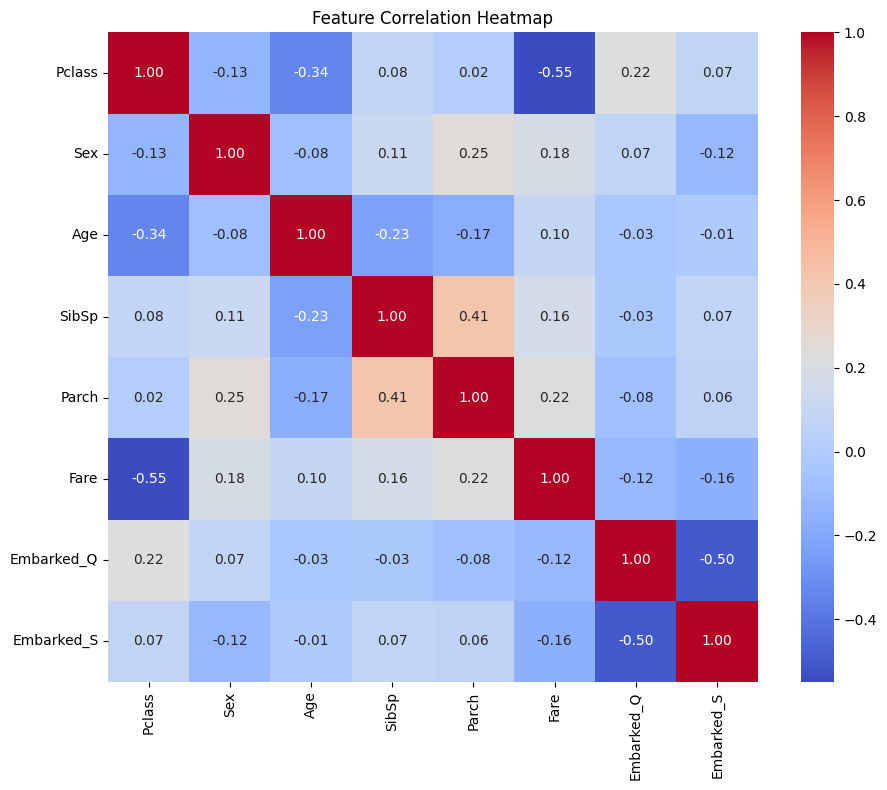

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# only including selected features in selected_df
selected_df = df[feature_columns]

# Computing correlation matrix
corr_matrix = selected_df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [293]:
from sklearn.model_selection import train_test_split

X = selected_df[feature_columns].copy()
y = df['Survived'].copy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [295]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.losses = []
        self.accuracies = []  # To store accuracy at each epoch
        self.theta = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.theta) + self.bias
            y_pred = self.sigmoid(linear_model)

            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            self.losses.append(loss)

            # Accuracy calculation
            y_pred_class = (y_pred >= 0.5).astype(int)
            accuracy = np.mean(y_pred_class == y)
            self.accuracies.append(accuracy)

            # Gradient calculation
            d_theta = np.dot(X.T, (y_pred - y)) / X.shape[0]
            d_bias = np.mean(y_pred - y)

            # Parameter update
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias

            if epoch % 100 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Train the model
model = LogisticRegressionGD(lr=0.1, epochs=1000)
model.fit(X_train_scaled, y_train)


Epoch 0, Loss: 0.6931, Accuracy: 0.3764
Epoch 100, Loss: 0.4597, Accuracy: 0.7978
Epoch 200, Loss: 0.4502, Accuracy: 0.8006
Epoch 300, Loss: 0.4487, Accuracy: 0.8034
Epoch 400, Loss: 0.4483, Accuracy: 0.8034
Epoch 500, Loss: 0.4482, Accuracy: 0.8006
Epoch 600, Loss: 0.4482, Accuracy: 0.8006
Epoch 700, Loss: 0.4482, Accuracy: 0.8006
Epoch 800, Loss: 0.4482, Accuracy: 0.8006
Epoch 900, Loss: 0.4482, Accuracy: 0.8006
Epoch 999, Loss: 0.4482, Accuracy: 0.8006


In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_scaled)

print("\n Evaluation Metrics (Manual Implementation ):")
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:   ", round(recall_score(y_test, y_pred), 4))
print("F1 Score: ", round(f1_score(y_test, y_pred), 4))



 Evaluation Metrics (Manual Implementation ):
Accuracy:  0.8101
Precision: 0.7857
Recall:    0.7432
F1 Score:  0.7639


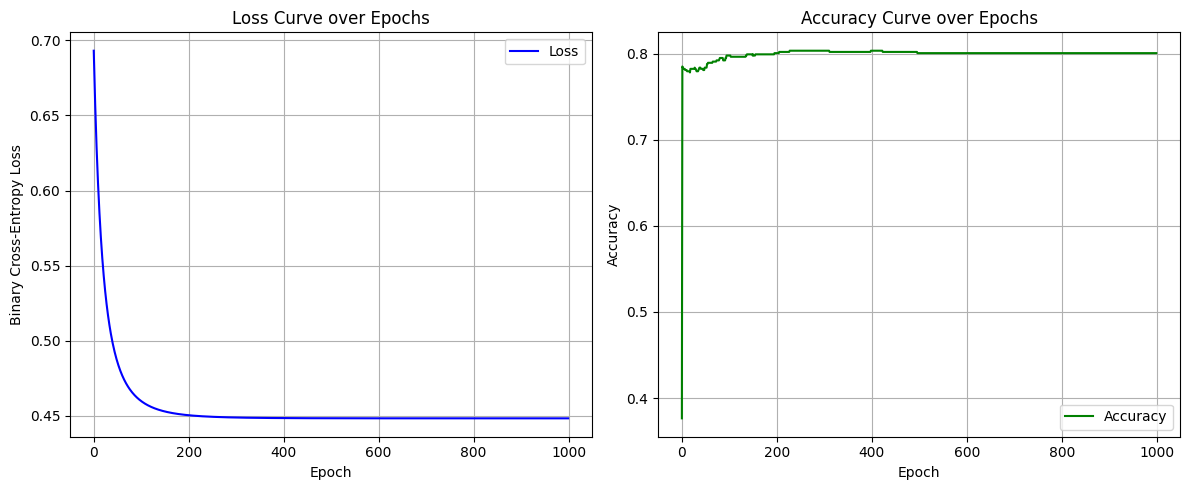

In [297]:
#  Loss and Accuracy Curves
epochs = range(len(model.losses))

plt.figure(figsize=(12, 5))

# for Loss Curve
plt.subplot(1, 2, 1)
plt.plot(epochs, model.losses, label="Loss", color="blue")
plt.title("Loss Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.legend()

# for Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, model.accuracies, label="Accuracy", color="green")
plt.title("Accuracy Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [298]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred_sklearn = clf.predict(X_test_scaled)

print("sklearn Accuracy:", accuracy_score(y_test, y_pred_sklearn))


sklearn Accuracy: 0.8100558659217877


In [299]:
#feature Engineering

df_fe = df.copy()
df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch']
df_fe['IsAlone'] = (df_fe['FamilySize'] == 0).astype(int)
df_fe['Age_Fare'] = df_fe['Age'] * df_fe['Fare']
df_fe['Sex_num'] = df_fe['Sex'].map({0: 0.5, 1: 1.0})
df_fe['Sex_Age'] = df_fe['Sex_num'] * df_fe['Age']
df_fe['Sex_Pclass'] = df_fe['Sex_num'] * df_fe['Pclass']



In [300]:
# Selecting features

features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Age_Fare', 'Sex_Age','Sex_num', 'Sex_Pclass']



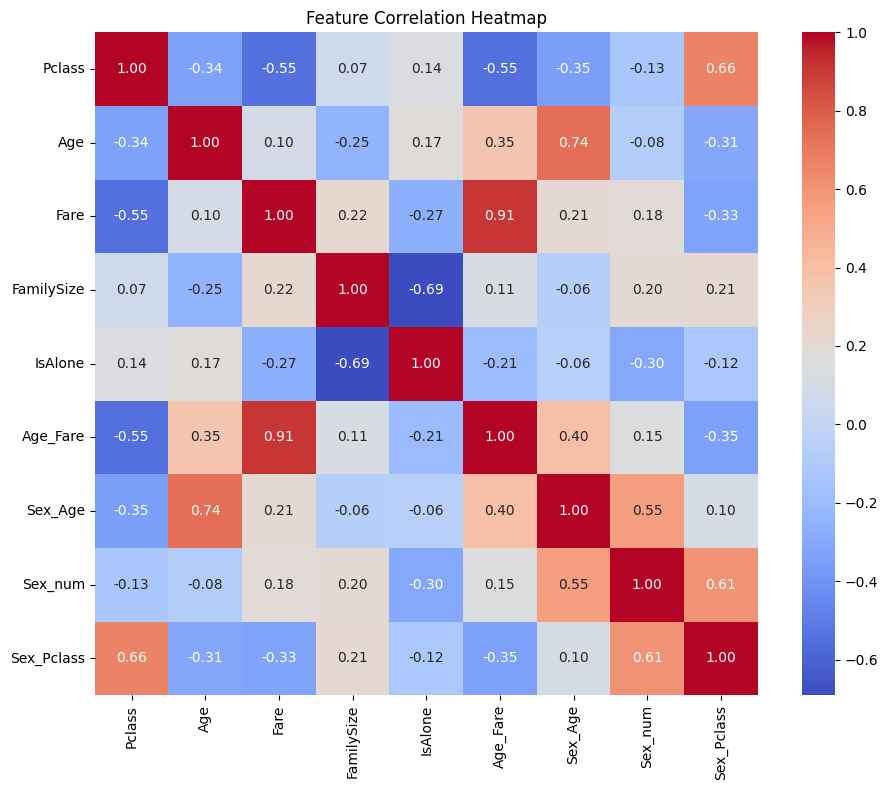

In [301]:
# only including selected features in selected_df
selected_df = df_fe[features]

# Computing correlation matrix
corr_matrix = selected_df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [302]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Age_Fare', 'Sex_Pclass']
# 'Pclass', 'Age', 'Fare', 'FamilySize', 'Age_Fare',


In [303]:
X = selected_df[features]
y = df_fe['Survived']

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [304]:
model = LogisticRegressionGD(lr=0.2, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Epoch 0, Loss: 0.6931, Accuracy: 0.3764
Epoch 100, Loss: 0.5034, Accuracy: 0.7823
Epoch 200, Loss: 0.4901, Accuracy: 0.7809
Epoch 300, Loss: 0.4875, Accuracy: 0.7809
Epoch 400, Loss: 0.4868, Accuracy: 0.7795
Epoch 500, Loss: 0.4865, Accuracy: 0.7795
Epoch 600, Loss: 0.4864, Accuracy: 0.7795
Epoch 700, Loss: 0.4863, Accuracy: 0.7795
Epoch 800, Loss: 0.4863, Accuracy: 0.7781
Epoch 900, Loss: 0.4862, Accuracy: 0.7781
Epoch 999, Loss: 0.4862, Accuracy: 0.7781


In [305]:
# Evaluation Metrics
print("Evaluation on Test Set with Feature Engineering:")
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:   ", round(recall_score(y_test, y_pred), 4))
print("F1 Score: ", round(f1_score(y_test, y_pred), 4))

Evaluation on Test Set with Feature Engineering:
Accuracy:  0.8436
Precision: 0.8026
Recall:    0.8243
F1 Score:  0.8133


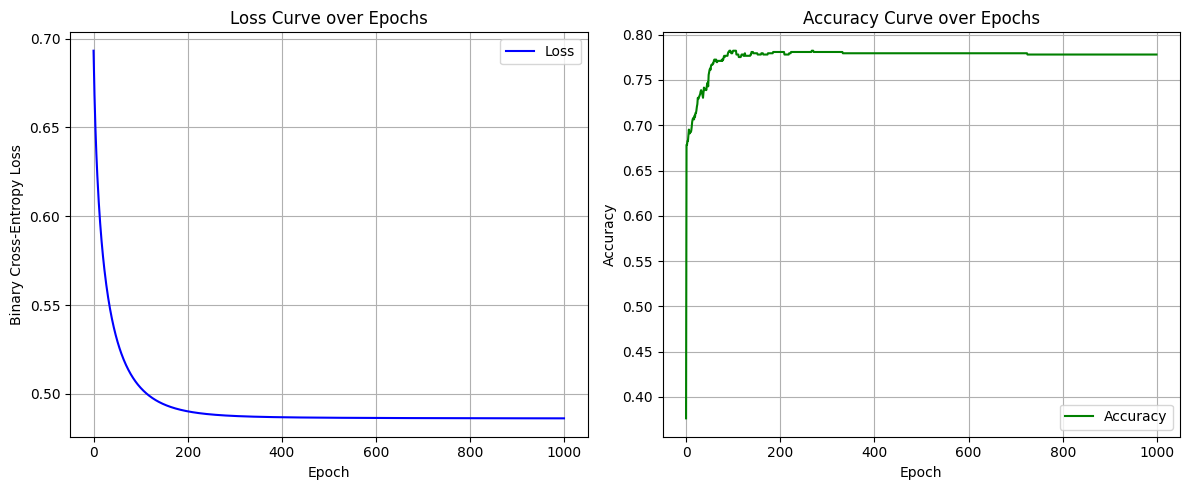

In [306]:
#  Loss and Accuracy Curves
epochs = range(len(model.losses))

plt.figure(figsize=(12, 5))

# for Loss Curve
plt.subplot(1, 2, 1)
plt.plot(epochs, model.losses, label="Loss", color="blue")
plt.title("Loss Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.legend()

# for Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, model.accuracies, label="Accuracy", color="green")
plt.title("Accuracy Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
